In [25]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np

In [26]:
dat=loadmat('MIT9_40S18_pset1/randomwalk.mat')

In [27]:
dat['X']

array([[  0,  -1,  -2, ...,   2,   1,   2],
       [  0,  -1,   0, ...,  18,  17,  18],
       [  0,   1,   0, ..., -12, -13, -14],
       ...,
       [  0,  -1,   0, ...,  78,  77,  76],
       [  0,   1,   0, ..., -36, -37, -38],
       [  0,  -1,  -2, ...,  16,  17,  18]], dtype=int16)

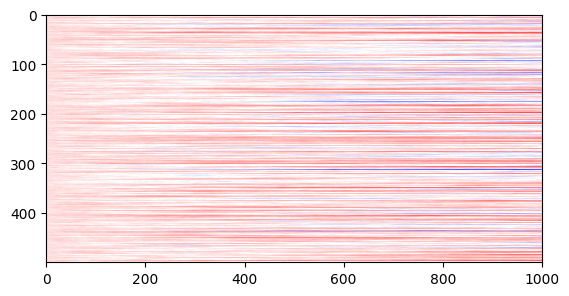

In [28]:
plt.imshow(dat['X'],cmap='bwr')

In [29]:
dat['X'].shape

(500, 1001)

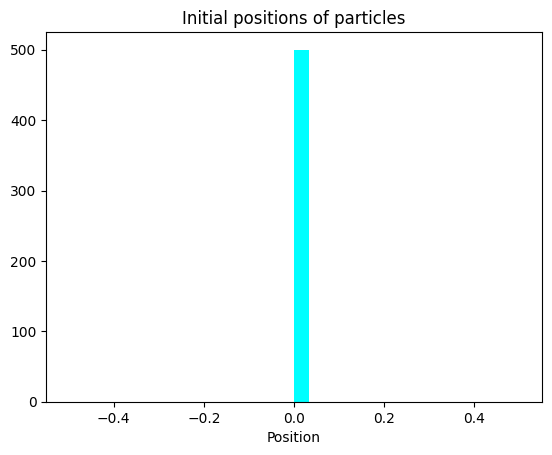

In [30]:
#Initial positions of particles
x0=dat['X'][:,0]
plt.hist(x0, bins=30, color='cyan')
plt.title('Initial positions of particles')
plt.xlabel('Position')
plt.show()

(array([ 2.,  1.,  1.,  3.,  1.,  2.,  7., 15., 11.,  6., 18., 35., 20.,
        28., 36., 39., 41., 40., 31., 20., 27., 21., 31., 15., 16., 13.,
         4.,  6.,  5.,  5.]),
 array([-98. , -92.2, -86.4, -80.6, -74.8, -69. , -63.2, -57.4, -51.6,
        -45.8, -40. , -34.2, -28.4, -22.6, -16.8, -11. ,  -5.2,   0.6,
          6.4,  12.2,  18. ,  23.8,  29.6,  35.4,  41.2,  47. ,  52.8,
         58.6,  64.4,  70.2,  76. ]),
 <BarContainer object of 30 artists>)

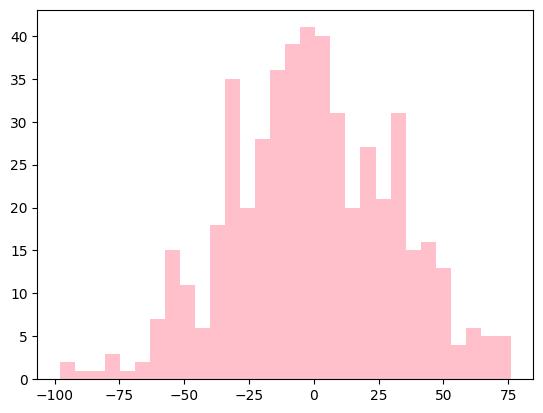

In [31]:
#Last column
xend=dat['X'][:,-1]
plt.hist(xend, bins=30, color='pink')


In [32]:
print(np.mean(xend))
print(np.std(xend))

-1.072
31.585610901168273


In [33]:
#The confidence interval contains 0, so we cannot reject the null hypothesis that the mean is 0.
import numpy as np
import scipy.stats as stats

# Given data
mean_xend = -1.072
std_xend = 31.585610901168273
n = len(xend)  # Number of samples

# Standard error of the mean (SEM)
sem = std_xend / np.sqrt(n)

# Desired confidence level
confidence_level = 0.95

# Critical value from the normal distribution (z-score)
z_critical = stats.norm.ppf(1 - (1 - confidence_level) / 2)
print(z_critical)

# Margin of error
margin_of_error = z_critical * sem

# Confidence interval
ci_lower = mean_xend - margin_of_error
ci_upper = mean_xend + margin_of_error

print(f"95% Confidence interval: ({ci_lower}, {ci_upper})")

1.959963984540054
95% Confidence interval: (-3.8405499912755383, 1.6965499912755382)


We get the normal distribution, because each trajectory is a sum of 1001 random variables with values 1 and -1. Each trajectory is a sample. 

Text(0.5, 0, 'Time')

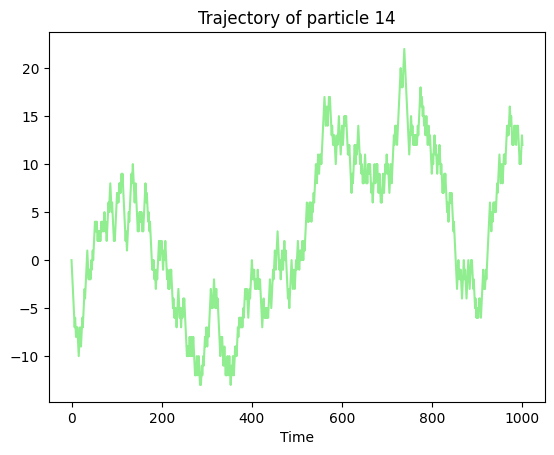

In [39]:
#Trajectory of particle 14
plt.plot(dat['X'][14,:], color='lightgreen')
plt.title('Trajectory of particle 14')
plt.xlabel('Time')

Text(0.5, 0, 'Time')

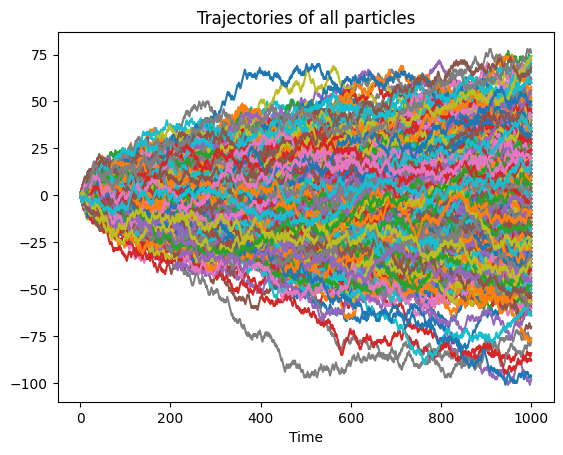

In [44]:
plt.plot(dat['X'].T)
plt.title('Trajectories of all particles')
plt.xlabel('Time')

Each particle follows a different trajectory, because it flips a coin independently for each particle at each timestep. 

(1001,)


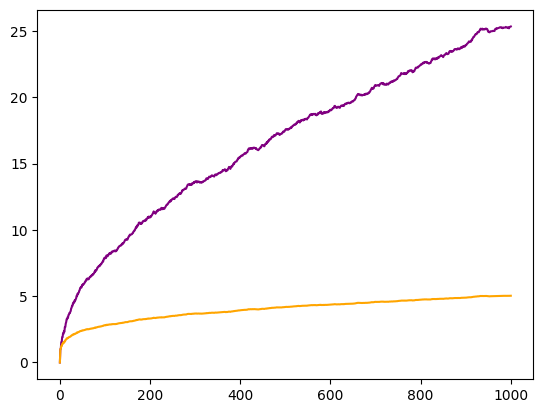

In [59]:
def mean_displacement_t(X):
    #broadcasting
    return np.mean(np.abs(-X), axis=0)
print(mean_displacement_t(dat['X']).shape)
mean_displacement=mean_displacement_t(dat['X'])
plt.plot(mean_displacement, color='purple')
plt.plot(np.sqrt(mean_displacement), color='orange')

In [56]:
print(np.std(dat['X'][:,-1]))
print(mean_displacement[-1])

31.585610901168273
25.352
